## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 - Les LLMs et la génération augmentée de récupération (RAG) pour les questions-réponses<br> Automne 2024 </center>


## Identification de l'équipe:

### Groupe de laboratoire:

### Equipe numéro :

### Membres:

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. Soyez précis ! N'indiquez pas seulement : travail réparti équitablement

## 1. Introduction

### 1.1. Description du TP4

Dans ce TP, vous allez travailler sur un système de **génération augmentée de récupération**, ou **RAG** (pour Retrieval Augmented Generation en anglais) qui combine des modèles de langue génératifs et de recherche d'information.

Étant donnée une question, il faudra retrouver les passages les plus pertinents  avec un modèle de recherche. Ensuite, il faudra générer une réponse à la question en utilisant ces passages de texte. Vous aurez finalement à trouver des manières d'améliorer les performances de votre modèle RAG.

L'ensemble est noté sur 100 points.

### Description des données

Les passages donnés sont des textes en anglais de quelques phrases sur divers sujets. Par exemple, les mathématiques, la physique, la chimie, la biologie l'informatique, la musique et la psychologie. En général, les textes abordent des sujets très spécifiques reliés à un domaine. Par exemple, il pourrait y avoir 1000 textes parlant d'informatique et 100 qui abordent, à leur manière, la notion de mémoire. Parmi ces 100 passages, 5 pourraient aborder la mémoire dans un processeur spécifique.

En ce qui concerne les questions, elles sont basées sur les sujets de certains textes précis et on peut y répondre à l'aide d'au moins un des textes. Dans certains cas, plusieurs textes sont nécessaires pour répondre à la question. Par exemple, plusieurs textes pourraient aborder le processeur Intel i7-13700k, mais la question pourrait nécessiter l'information de tous ces textes pour trouver la réponse. 
Les questions ont été créées pour faire en sorte que les réponses soient assez courtes. Il peut s'agir d'un simple nombre ou de quelques mots (< 30 mots).


Vous trouverez ~ 13 000 passages dans le corpus pour ~ 1 700 paires de questions / réponses dans le jeu d'entraînement et ~ 500 dans le jeu de validation. Vous devez prédire 500 réponses aux questions du jeu de test.

### Exemple

Par exemple, pour la question

> What type of bonds are used to form branches in glycogen?

Avec l'approche RAG, plutôt que de générer la réponse directement, on va d'abord chercher dans un corpus de passages. Dans cet exemple, un des passages pertinents est :

> **Glycogen Structure and Function** : Glycogen is a molecular polymer of glucose used for energy storage. It is composed of linear chains of glucose molecules linked by α-1,4-glycosidic bonds, with branches formed off the chain via α-1,6-glycosidic bonds. The branches provide additional ""free ends"" for linear chains, allowing for faster glucose release.

Puis on génère une réponse conditionnée par les passages pertinents :

> α-1,6-glycosidic bonds

### Motivation

Le RAG est une approche très populaire en ce moment. Elle permet notamment d'avoir des sources qui supportent les réponses générées, ce qui peut être utile pour la vérification de faits ou pour contrôler les hallucinations. De plus, elle permet d'intégrer des connaissances externes et récentes dans les modèles de génération sans avoir à les ré-entraîner.

### Objectif du TP

Dans ce TP, vous implémenterez plusieurs systèmes de question-réponse. D'abord, vous testerez une approche de prompting qui n'utilise aucun passage pour aider le modèle de génération. Puis vous implémenterez un système figé qui utilise un modèle de plongements figé pour retrouver les $k$ passages les plus pertinents. Ces passages seront ensuite donnés à un modèle de génération figé aussi.

Enfin, vous implémenterez votre propre méthode dans l'objectif d'atteindre les meilleures performances dans la compétition Kaggle.

### Jeux de données

Vous avez 4 fichiers à votre disposition :
- 'rag_texts.csv' : le corpus de passages extraits de Wikipédia.
  - **id** : l'identifiant unique du passage.
  - **text** : le texte du passage.
- 'rag_questions_train.csv', 'rag_questions_val.csv' et 'rag_questions_test.csv' : les questions d'entraînement, de validation et de test.
  - **id** : l'identifiant unique de la question.
  - **question** : La question.
  - **text_id** (sauf pour le fichier de test) : la liste des identifiants des passages pertinents du corpus 'rag_texts.csv' pour la question.
  - **answer** (sauf pour le fichier de test) : la réponse à la question.

### Contraintes

- **Modèle génératif** : pour des raisons d'équité, le seul modèle de génération que vous pouvez utiliser est [microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct), disponible sur Hugging Face. Cette contrainte permet de mieux comparer les différentes approches et d'éviter que la performance soit uniquement due à un modèle de génération plus performant.
- Données externes : vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies.
- Modèles de plongements à utiliser: [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)

### 1.2. Librairies permises

Vous pouvez utiliser les librairies suivantes
- Numpy
- Pandas
- HuggingFace
- nltk
- SpaCy
- PyTorch
- faiss
- Langchain
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

### 1.3. Infrastructure

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

### 1.4. Remise

### Échéance

Fin de la session. La date précise sera indiquée dans les boites de remise sur Moodle.


### Livrables

Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les numéros de questions avec vos réponses dans le pdf grâce à l'outil que fournit Gradescope.


### Critères
1. Implantation correcte et efficace
2. Richesse de la solution proposée
3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
4. Commentaires clairs et informatifs
5. Aspect novateur
6. État de l'art synthétisé
7. Performance attendue des modèles
8. Réponses correctes/sensées aux questions de réflexion ou d'analyse

### CODE D’HONNEUR
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.


### 1.5. Kaggle

La compétion Kaggle sera accessible ici: https://www.kaggle.com/t/c970abbf273b4e13a642fce3bfe219be.

Vous devez recréer des équipes de 3 personnes sur Kaggle avec le même nom d'équipe que sur Moodle ainsi que les mêmes membres.

Le TP4 se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos meilleurs modèles.  
Pour tester votre modèle au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Il y aura deux types de résultats : votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants.
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle).


### 1.6. Description des données et métriques d’évaluation

Dans votre fichier de soumission, il doit y avoir une colonne _id_ et une colonne _answer_. La colonne _id_ doit correspondre à l'identifiant unique de la question et la colonne _answer_ doit correspondre à la réponse générée par votre modèle.

Nous utiliserons la métrique **BLEU**, vue en cours, pour évaluer les réponses générées par rapport au jeu de référence (gold standard).

In [1]:
# Import des librairies
import os
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from typing import Optional
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
from nltk.translate.bleu_score import sentence_bleu
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
import nltk
import itertools
import time
from torch.utils.data import Dataset
import faiss
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm 
from peft import LoraConfig, get_peft_model

In [2]:
root_path = './'
data_path = root_path + 'data/'

## 2. Analyse exploratoire et modèle de génération simple (15 points)

Pour commencer ce TP, et pour fixer des modèles de base (baselines), vous allez utiliser un modèle de génération simple pour répondre aux questions. Vous utiliserez le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'** disponible sur Hugging Face. Dans cette partie, vous devez simplement générer des réponses aux questions de l'ensemble de validation (_questions_val.csv_) sans utiliser de passages pour aider le modèle.

### 2.1. Chargement des données (5 points)

#### 2.1.1 Taille des données (1 point)

Affichez la taille de tous les jeux de données et quelques questions de l'ensemble d'entraînement

In [5]:
# TODO

# Lecture des jeux de données
questions_test = pd.read_csv(data_path + 'questions_test.csv')
questions_train = pd.read_csv(data_path + 'questions_train.csv')
questions_val = pd.read_csv(data_path + 'questions_val.csv')
texts = pd.read_csv(data_path + 'texts.csv')

# Récupérations des colonnes pertinentes (utile pour plus tard)
passages = texts['text'].tolist()
questions_t = questions_test['question'].tolist()
questions_tr = questions_train['question'].tolist()
questions_v = questions_val['question'].tolist()

# Affichage des éléments demandés
print(f"Taille du jeu d'entrainement : {len(questions_train)} \nTaille du jeu de validation : {len(questions_val)} \nTaille du jeu de test  :{len(questions_test)}\n")

print("Quelques questions de l'ensemble d'entrainement :")
questions_train['question'].head()

# END TODO

Taille du jeu d'entrainement : 1747 
Taille du jeu de validation : 500 
Taille du jeu de test  :500

Quelques questions de l'ensemble d'entrainement :


0    What type of insects are vectors for the Haemo...
1    What is the basis of the security of the BBS a...
2    What is the purpose of the catalase test in ba...
3    What type of cells clear small particles in ve...
4    What information is needed to decrypt a messag...
Name: question, dtype: object

#### 2.1.2 Analyse exploratoire (4 points)

a) Sur l'ensemble d'entraînement, affichez :
- Le nombre moyen de mots dans une question
- Le nombre moyen de mots dans une réponse
- Le nombre moyen de passages nécessaires pour répondre à une question
- Le nombre minimal de passages nécessaires pour répondre à une question
- Le nombre maximal de passages nécessaires pour répondre à une question


In [6]:
# TODO

data_question_word_count = questions_train['question'].apply(lambda x: len(x.split()))
mean_words_q = round(np.mean(data_question_word_count), 2)


data_answer_word_count = questions_train['answer'].apply(lambda x: len(x.split()))
mean_words_r = round(np.mean(data_answer_word_count), 2)

mean_passages = round(np.mean(questions_train['text_ids'].apply(lambda x: len(x.split()))),2)
min_passages = np.min(questions_train['text_ids'].apply(lambda x: len(x.split())))
max_passages = np.max(questions_train['text_ids'].apply(lambda x: len(x.split())))

print(f"Le nombre moyen de mots dans une question : {mean_words_q}\n"
      f"Le nombre moyen de mots dans une réponse : {mean_words_r}\n"
      f"Le nombre moyen de passages nécessaires pour répondre à une question : {mean_passages}\n"
      f"Le nombre minimal de passages nécessaires pour répondre à une question : {min_passages}\n"
      f"Le nombre maximal de passages nécessaires pour répondre à une question : {max_passages}\n")

# END TODO

Le nombre moyen de mots dans une question : 10.37
Le nombre moyen de mots dans une réponse : 6.08
Le nombre moyen de passages nécessaires pour répondre à une question : 2.84
Le nombre minimal de passages nécessaires pour répondre à une question : 2
Le nombre maximal de passages nécessaires pour répondre à une question : 4



b) De plus, affichez des histogrammes décrivant la distribution du nombre de mots des questions, des réponses et des textes. Utilisez des bacs (bins) de 50. Commentez vos résultats.

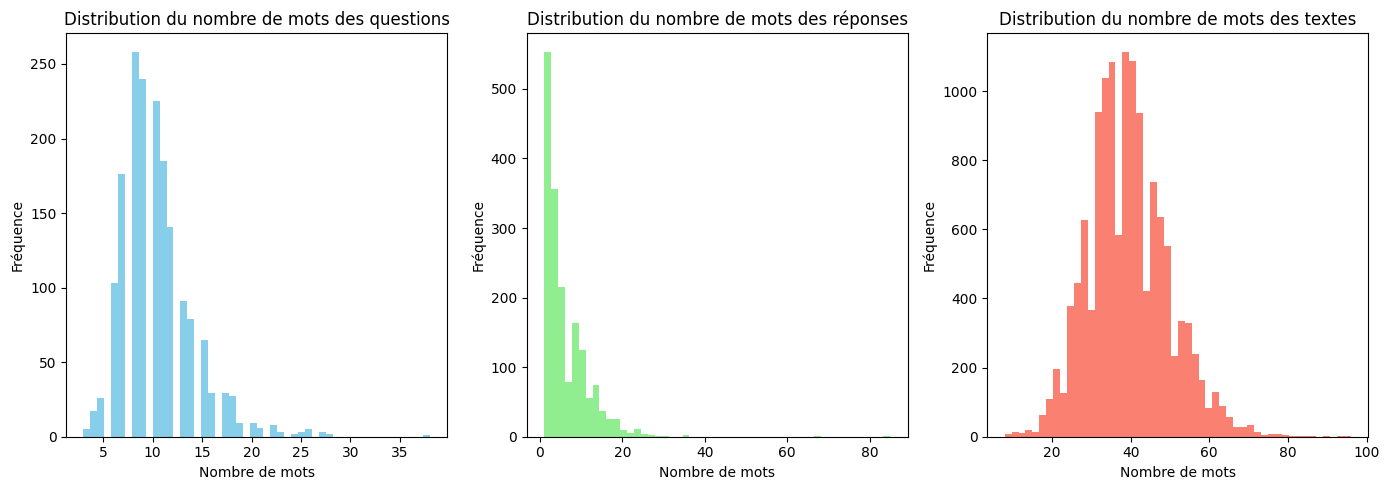

In [7]:
# TODO

texts_world_count = texts['text'].apply(lambda x: len(x.split()))
bins = 50

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(data_question_word_count, bins=bins, color='skyblue')
plt.title('Distribution du nombre de mots des questions')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

plt.subplot(1, 3, 2)
plt.hist(data_answer_word_count, bins=bins, color='lightgreen')
plt.title('Distribution du nombre de mots des réponses')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

plt.subplot(1, 3, 3)
plt.hist(texts_world_count, bins=bins, color='salmon')
plt.title('Distribution du nombre de mots des textes')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# TODO

Commentaire :   
On observe une distribution globalement gaussienne pour la distribution du nombre de mots dans les textes. Une telle observation peut rester également valable pour la distribution du nombre de mots dans les questions et dans les réponses, même si cela reste moins visible.   
De plus, on peut voir des données bruitées dans le jeu d’entrainement avec par exemple une réponse à 85 mots (réponse en réalité incohérente) ou encore une question à 38 mots.

### 2.2. Chargement du modèle et génération des réponses (5 points)

Nous allons maintenant évaluer la performance d'un modèle de langue à répondre aux questions de l'ensemble de validation. Chargez d'abord le modèle **'microsoft/Phi-3-mini-128k-instruct'** avec la librairie `transformers` de huggingface et générez les réponses du modèle à partir de la question. Générez au maximum 32 nouveaux jetons.

In [8]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = 'microsoft/Phi-3-mini-128k-instruct'
gen_tokenizer = AutoTokenizer.from_pretrained(model_name)
gen_model = AutoModelForCausalLM.from_pretrained( 
    model_name,  
    device_map=DEVICE,  
    torch_dtype=torch.bfloat16,  
    trust_remote_code=True 
)

`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
def process_batch(batch_questions, tokenizer, model, context, device):
    inputs = [
        tokenizer.apply_chat_template(
            [{'role': 'system', 'content': 'You are a helpful assistant.'},
             {'role': 'user', 'content': context + question}],
            tokenize=False,
            add_generation_prompt=True
        )
        for question in batch_questions
    ]
    inputs = tokenizer(inputs, return_tensors="pt", padding=True).to(device)

    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=32
    )
    responses = [
        tokenizer.decode(output[inputs.input_ids.size(1):], skip_special_tokens=True)
        for output in outputs
    ]
    return responses

In [11]:
batch_size = 8
context = "Give a concise answer : "

generated_responses = []
for i in range(0, len(questions_v), batch_size):
    batch_questions = questions_v[i:i + batch_size]
    batch_response = process_batch(batch_questions, gen_tokenizer, gen_model, context, DEVICE)
    generated_responses.extend(batch_response)
    
print(generated_responses)

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
You are not running the flash-attention implementation, expect numerical differences.


['The M201V variant of CYSLTR2 shows reduced responsiveness to LTD4.', 'Carbapenems have a different core structure with a β-lactam ring fused to a δ-1 carbapenem', 'Two types of facets: 8-demicubes and 8-orthoplexes.', 'Scheduled under the Controlled Substances Act as a Schedule I drug.', 'Estrone', '3-HO-PCP has high affinity for the 5-HT2A and 5-HT2C serotonin recept', 'On chromosome 9p21.3', 'A fluoroquinolone antibiotic.', 'Glutamate', 'BARF is not an anion; it is a colloquial term for raw food diets in animals.', 'The electron heat capacity at low temperatures can be approximated by the expression \\( C_v \\approx 3k_B T^2 \\), where', 'To present antigen fragments to CD4+ T cells.', 'Stibine (SbH3) is not typically used in the semiconductor industry; it is a toxic gas and not a semicon', 'To facilitate the substitution of the hydroxyl or amino group with a chlorine atom.', 'The most common method of CDC synthesis is through the enzymatic action of DNA polymerases.', 'The stiffne

In [12]:
df_true = questions_val[['id', 'answer']].copy()
df_pred = questions_val[['id']].copy()
df_pred['answer'] = generated_responses

### 2.3. Évaluation des réponses (3 points)

Complétez la fonction `evaluate_bleu` et utilisez la métrique BLEU pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. Évaluez votre modèle avec les métriques BLEU-1 et BLEU-2. BLEU-1 ne considère que les unigrammes pour évaluer la réponse et BLEU-2 considère les bigrammes aussi. Pour séparer une séquence en mots, vous pouvez simplement utiliser la fonction `split()`.

In [13]:
def evaluate_bleu(df_true: pd.DataFrame, df_pred: pd.DataFrame, bleu_type: int):
    """
    Évalue les réponses générées en utilisant la métrique BLEU.

    Paramètres:
    df_true (pd.DataFrame): DataFrame contenant les vraies réponses avec des colonnes 'id' et 'answer'.
    df_pred (pd.DataFrame): DataFrame contenant les réponses prédites avec des colonnes 'id' et 'answer'.
    bleu_type (int): Nombre (soit 1 ou 2) correspondant aux n-grammes considérés pour la métrique (bleu_type = 1 : BLEU-1, bleu_type = 2 : BLEU-2)

    Retourne:
    float: Score BLEU moyen sur toutes les entrées.
    """
    # TODO

    df_merged = pd.merge(df_true[['id', 'answer']], df_pred[['id', 'answer']], on='id', suffixes=('_true', '_pred'))

    weights = (1.0, 0.0, 0.0, 0.0) if bleu_type == 1 else (0.5, 0.5, 0.0, 0.0)
    
    bleu_scores = []

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for _, row in df_merged.iterrows():
            reference = row['answer_true'].split()
            candidate = row['answer_pred'].split() 

            bleu_score = sentence_bleu([reference], candidate, weights=weights)
            bleu_scores.append(bleu_score)
        
    mean_bleu = sum(bleu_scores) / len(bleu_scores)
    return mean_bleu

    # END TODO

In [14]:
# TODO
print(f"Le score BLEU-1 est {evaluate_bleu(df_true, df_pred, 1):.3f}.")
print(f"Le score BLEU-2 est {evaluate_bleu(df_true, df_pred, 2):.3f}.")
# TODO

Le score BLEU-1 est 0.186.
Le score BLEU-2 est 0.080.


### 2.4. Commentaire (2 points)

Reportez, puis commentez la performance obtenue ici.

Performance obtenue :  
BLEU-1 -> 0.186   
BLEU-2 -> 0.080

Commentaire :   
Les scores BLEU-1 et BLEU-2 indiquent que les réponses du modèle correspondent peu aux références, avec des problèmes de choix lexical (BLEU-1) et de cohérence contextuelle (BLEU-2)

## 3. Approche RAG figé (45 points)

Dans cette partie, vous allez implémenter une approche simple de RAG figé. On dit ici que le modèle est figé car on ne ré-entraîne aucun modèle. Vous implémenterez deux variantes : avec ou sans l'utilisation d'un algorithme d'indexation.

Dans la méthode d'implémentation du RAG figé, vous allez d'abord retrouver les passages pertinents pour chaque question avec un modèle de plongements de type Transformers, puis générer une réponse conditionnée par ces passages.

Dans cette partie, on utilisera
- le modèle de plongements (embedding-model) **[BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)** pour obtenir les vecteur de plongements des questions et des passages
- le modèle de génération (generative-model) **[microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)** pour générer les réponses

### 3.1 RAG figé sans indexation (23 points)

#### 3.1.1 Passages pertinents (8 points)

Pour retrouver les passages pertinents, vous devez d'abord encoder les questions et les passages avec le modèle de plongements. Puis, vous devez calculer la similarité cosinus entre les questions et les passages pour retrouver les $k$ passages les plus pertinents pour chaque question.

In [59]:
# TODO
from transformers import AutoTokenizer, AutoModel
BATCH_SIZE = 32
model_name = 'BAAI/bge-small-en-v1.5'
emb_tokenizer = AutoTokenizer.from_pretrained(model_name)
emb_model = AutoModel.from_pretrained(model_name).to(DEVICE)
# END TODO

In [17]:
def encode_sequences(sequences: list, tokenizer, model, device = DEVICE, batch_size = BATCH_SIZE, is_training = False):
    """
    Encode les textes en utilisant le modèle passé en paramètre pour générer les plongements des textes

    Paramètres:
    sequences   : Liste de séquence à transformer en plongements
    tokenizer   : Segmenteur du modèle de plongements
    model       : Modèle de plongements
    device      : Machine sur laquelle les opérations doivent être effectuées
    batch_size  : Taille des lots lors de la génération des traitements
    is_training : Variable qui indique si l'encodage se fait avec un modèle en entrainement ou en évaluation (utile pour plus tard)
    """
    # TODO

    if is_training:
        model.train() 
    else:
        model.eval() 

    embeddings = []
    
    context = torch.enable_grad() if is_training else torch.no_grad()

    embeddings = []
    with context:  
        for i in range(0, len(sequences), batch_size):
            batch = sequences[i:i + batch_size]
        
            inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
            output = model(**inputs).last_hidden_state
            embedding = output.mean(dim=1)  # Moyenne sur la dimension des tokens pour avoir la représentation de la séquence
            embeddings.append(embedding)
    
    return torch.cat(embeddings, dim=0)

    # END TODO

#### 3.1.2 Évaluation des passages retrouvés avec Recall@k et precision@k (7 points)

Maintenant que les passages ont tous été encodés, on peut évaluer si les passages retrouvés sont pertinents. En prenant les $k$ premiers passages, on peut évaluer si on retrouve les bons passages associés aux questions. C'est un des avantages du système RAG : on peut évaluer de façon indépendante la qualité du système qui retrouve les passages pertinents et de celui qui génère les réponses. Cela permet notamment d'évaluer quels sont les points forts et points faibles du système.

Pour cela, vous allez utiliser les métriques **Precision@k** et **Recall@k** définies dans les équations suivantes. Implémentez ces métriques.

$$\text{Precision@k} = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{k}$$

$$\text{Recall@k} (Rappel@k) = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{\text{Nombre total d'éléments pertinents}}$$


In [18]:
def compute_recall_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Recall@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne:
    Recall moyen
    """
    # TODO
    total_recall = 0
    for true_texts, predicted_texts in zip(ground_truth, predictions):

        true_set = set(true_texts)  
        predicted_set = set(predicted_texts)

        relevant_and_retrieved = true_set.intersection(predicted_set)
        
        recall = len(relevant_and_retrieved) / len(true_set)
        total_recall += recall
   
    average_recall = total_recall / len(ground_truth) 
    return average_recall

    # END TODO

In [19]:
def compute_precision_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Precision@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne: 
    Précision moyenne
    """

    # TODO

    total_precision = 0
    for true_texts, predicted_texts in zip(ground_truth, predictions):
        true_set = set(true_texts)
        predicted_set = set(predicted_texts)
        relevant_and_retrieved = true_set.intersection(predicted_set)
        
        precision = len(relevant_and_retrieved) / len(predicted_set) 
        total_precision += precision
    
    average_precision = total_precision / len(ground_truth) 
    return average_precision

    # END TODO


#### 3.1.3 Résultat d'évaluation (5 points)
Implémentez la fonction _'retrieve_passages'_ qui retourne les indices des $k$ passages les plus similaires pour une question. Utilisez la similarité cosinus pour comparer les passages et les questions. Évaluez ensuite votre modèle récupérant les passages avec les métriques Precision@k et Recall@k sur le jeu de validation. Calculez avec $k={1, 2, 3, 4, 5}$.

In [20]:
def cosine_similarity(questions_encoded, text_embeddings):
    # Normalisation des embeddings
    questions_normed = questions_encoded / torch.norm(questions_encoded, p=2, dim=1, keepdim=True)
    texts_normed = text_embeddings / torch.norm(text_embeddings, p=2, dim=1, keepdim=True)
    
    # Calcul de la similarité cosinus
    cosine_distance = torch.mm(questions_normed, texts_normed.t())
    return cosine_distance

In [21]:
def retrieve_passages(questions: list, passage_embed: torch.Tensor, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    passage_embed   : Tenseur contenant les plongements de chaque passage (n, dim)
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO

    question_embeddings = encode_sequences(questions, embedding_model_tokenizer, embedding_model)
    similarities = cosine_similarity(question_embeddings, passage_embed)
    top_k_indices = torch.topk(similarities, k=k, dim=-1).indices.tolist() # Indices du topk des passages (dim=-1) pour une question donnée

    return top_k_indices

    # END TODO


In [22]:
# TODO

passage_embed = encode_sequences(passages, emb_tokenizer, emb_model)
top_ground_truth = questions_val['text_ids'].apply(lambda x: [int(num) for num in x.strip('[]').split()]).to_list()

recall  = []
precision = []
for k in range(1,6) : 
    top_passages = retrieve_passages(questions_v, passage_embed, k, emb_tokenizer, emb_model)
    rec_at_k = compute_recall_at_k(top_ground_truth, top_passages)
    prec_at_k = compute_precision_at_k(top_ground_truth, top_passages)
    recall.append(rec_at_k)
    precision.append(prec_at_k)
    print(f'precision at {k} = {round(prec_at_k ,3) }')
    print(f'recall at {k} = {round(rec_at_k, 3)} \n')
    
# END TODO

precision at 1 = 0.892
recall at 1 = 0.334 

precision at 2 = 0.675
recall at 2 = 0.492 

precision at 3 = 0.562
recall at 3 = 0.607 

precision at 4 = 0.503
recall at 4 = 0.717 

precision at 5 = 0.444
recall at 5 = 0.785 



#### 3.1.4 Graphique (3 points)
Affichez maintenant un graphique de vos résultats de la question précédente en mettant à l'axe des x la valeur de $k$ et à l'axe des y la valeur de la précision et du rappel. Quel est le nombre optimal de passages à passer au modèle en vous basant sur le recall@k et precision@k ? Pourquoi ?

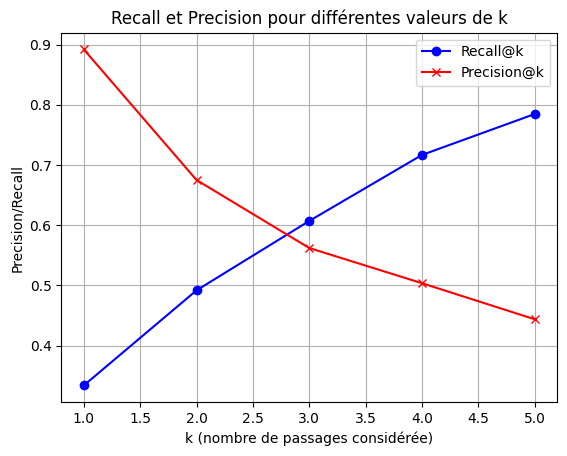

In [23]:
# TODO

plt.plot(range(1,6), recall, marker='o', color='b', label='Recall@k')
plt.plot(range(1,6), precision, marker='x', color='r', label='Precision@k')
plt.xlabel('k (nombre de passages considérée)')
plt.ylabel('Precision/Recall')
plt.title('Recall et Precision pour différentes valeurs de k')
plt.legend()
plt.grid(True)
plt.show()

# END TODO

Commentaire :   
Une valeur de k=3 semble pertinente, car elle offre un bon équilibre entre précision et rappel.

In [24]:
def f1_score(recall, precision) : 
    return (2*precision*recall)/(precision+recall)
for k, (prec,rec) in enumerate(zip(precision, recall), 1) : 
    print(f'F1-score at {k} : {f1_score(rec, prec)}')

F1-score at 1 : 0.4856633124830027
F1-score at 2 : 0.5689285714285715
F1-score at 3 : 0.5836338751069288
F1-score at 4 : 0.5914629149023359
F1-score at 5 : 0.5667794181502387


### 3.2 RAG figé avec FAISS (14 points)

Maintenant on vous demande d'utiliser FAISS pour l'indexation des plongements des passages.

[FAISS (Facebook AI Similarity Search)](https://ai.meta.com/tools/faiss/) est une bibliothèque open-source développée par Meta pour la recherche de similarité rapide sur des vecteurs denses, comme des embeddings de textes ou d'images. Elle est optimisée pour gérer de grands volumes de données en haute dimension et peut être accélérée avec des GPU. FAISS est largement utilisée pour des systèmes de recommandation ou la recherche d'information à grande échelle. Pour plus de détails, veuillez consulter  [le tutoriel sur Moodle](https://moodle.polymtl.ca/course/view.php?id=2813).


#### 3.2.1 Initialisez l'indexation FAISS avec les plongements des passages (2 points)

Utilisez les plongements des passages générés au niveau de la question 3.1.1 et indexez-les avec FAISS. Vérifiez que le nombre de plongements dans l'objet FAISS est bien le même que le nombre de passages. N'oubliez pas qu'on veut une indexation basée sur la similarité cosinus.

In [25]:
# TODO
passage_embeddings = passage_embed.cpu().numpy()

faiss.normalize_L2(passage_embeddings) #  Normalisation des vecteurs pour l'approche similarité cosinus
d = passage_embeddings.shape[1]
index = faiss.IndexFlatIP(d)  # Index Faiss
index.add(passage_embeddings)
# END TODO

#### 3.2.2 Récupération des passages avec FAISS (4 points)

Implémentez la fonction _'retrieve_passages_faiss'_ qui retourne les indices des $k$ passages les plus similaires pour une question à l'aide d'un indexation FAISS


In [26]:
def retrieve_passages_faiss(questions: list, vector_index: faiss.IndexFlatL2, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    vector_index    : L'objet d'indexation FAISS
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO
    question_embeddings = encode_sequences(questions, embedding_model_tokenizer, embedding_model)
    
    # Normalisation
    question_embeddings = question_embeddings.cpu().numpy()
    faiss.normalize_L2(question_embeddings)
    
    # Top-k des passages
    _, top_k_indices = vector_index.search(question_embeddings, k)
    
    return top_k_indices
    # END TODO

#### 3.2.3 Exécution de FAISS (4 points)

Exécutez maintenant la fonction _"retrieve_passages_faiss"_ pour récupérer les bons passages pour les questions du jeu de validation avec votre k optimal.

In [28]:
# TODO
top_passages = retrieve_passages_faiss(questions_v, index, 3, emb_tokenizer, emb_model)
print(top_passages)
# END TODO

[[10039  1885  4270]
 [ 8865  5333  2651]
 [11620  4618 10382]
 ...
 [ 2838  1001  7523]
 [13016 10021 11171]
 [ 1728  5978  6130]]


#### 3.2.4 Calculez les métriques Precision@K et Rappel@K pour les passages retrouvés avec FAISS avec votre k optimal (2 points) 

In [29]:
# TODO
print(compute_recall_at_k(top_ground_truth, top_passages))
print(compute_precision_at_k(top_ground_truth, top_passages))
# END TODO

0.6069999999999997
0.5619999999999998


#### 3.2.5 Quelle remarque pouvez-vous faire sur l'utilisation de FAISS en termes de passages retrouvés, de temps d'exécution et de tout autre élément qui vous semble approprié ? (2 points)

FAISS accélère la recherche en identifiant rapidement les passages pertinents grâce à des techniques d'indexation efficaces, sans modifier le contenu des passages sélectionnés. En effet, la fonction "retrieve_passages_faiss" s'exécute bien plus rapidement que la fonction 'retrieve_passages' et retrouve les mêmes passages pertinents. Il y a donc une diminution du temps d'exécution tout en gardant la même performance.   

### 3.3 Génération des réponses (5 points)

Générez maintenant les réponses des questions sur l'ensemble de validation avec les passages récupérés. Pour générer les réponses, vous devez concaténer les passages pertinents avec la question et donner le tout au modèle de génération. Faites-le sur l'ensemble du jeu de validation. Pour la méthode, vous avez le choix entre les passages retrouvés avec FAISS ou manuellement (avec votre propre implémentation). Faites cela pour toutes les valeurs de $k$: (1, 2, 3 et 4).

In [30]:
def generate_prompts(questions, index, emb_tokenizer, emb_model, k) : 
    prompts = []
    faiss_passages = retrieve_passages_faiss(questions, index, k, emb_tokenizer, emb_model)  
    help_instruction = "Give a concise answer to the question using the following information : "

    # Boucle sur chaque question et ses passages associés
    for i, passages_id in enumerate(faiss_passages):
        passages = []

        # Récupérer les textes des passages associés à la question actuelle
        for passage_id in passages_id:
            passage_text = texts[texts['id'] == passage_id]['text'].iloc[0]
            passages.append(passage_text)

        # Construire le contexte complet et l'ajouter à la liste des prompts
        context_string = (
            f"{help_instruction}\n" +
            "\n".join([f"{passage}" for j, passage in enumerate(passages)]) +
            "\n" +
            f"{questions[i]}\n"
        )
        prompts.append(context_string)
    return prompts

In [31]:
# TODO

# Générez les prompts
k_values = [1, 2, 3, 4]
prompts_k = {}  # Dictionnaire pour stocker les prompts par valeur de k

for k in k_values:
    prompts_k[k] = generate_prompts(questions_v, index, emb_tokenizer, emb_model, k)
        
# END TODO

Affichez un exemple d'invite (prompt) qui sera envoyé au modèle de génération

In [32]:
# TODO
# Affichez un exemple d'invite
print(prompts_k[2][0])
# END TODO

Give a concise answer to the question using the following information : 
 Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect.
 Cysteinyl leukotriene receptor 2 (CYSLTR2) is a receptor that binds to cysteinyl leukotrienes (CysLTs) and contributes to mediating allergic and hypersensitivity reactions in humans. It is expressed in various cell types, including blood eosinophils, platelets, and tissue mast cells.
What is the effect of the M201V variant of CYSLTR2 on responsiveness to LTD4?



In [33]:
def process_batch_prompts(batch_prompts, tokenizer, model, device):
    inputs = [
        tokenizer.apply_chat_template(
            [{'role': 'system', 'content': 'You are a helpful assistant.'},
             {'role': 'user', 'content': prompt}], 
            tokenize=False,
            add_generation_prompt=True
        )
        for prompt in batch_prompts
    ]
    
    # Convertir les entrées en tenseurs pour le modèle
    inputs = tokenizer(inputs, return_tensors="pt", padding=True).to(device)
    
    # Générer les réponses pour le batch
    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=32
    )
    
    # Décoder les réponses
    responses = [
        tokenizer.decode(output[inputs.input_ids.size(1):], skip_special_tokens=True)
        for output in outputs
    ]

    return responses

In [34]:
def chunked_iterable(iterable, size):
    it = iter(iterable)
    while True:
        chunk = tuple(itertools.islice(it, size))
        if not chunk:
            return
        yield chunk

In [35]:
def generate_responses(gen_model, gen_tokenizer, prompts, batch_size = 16) : 
    batch_responses = []
    
    # Utilisation de chunked_iterable pour créer des lots
    for batch_index, batch_prompts in enumerate(chunked_iterable(prompts, batch_size)):
        print(f"[k={k} | Batch {batch_index}] Started generation...")
        start_time = time.time()
        
        # Processus de traitement du lot
        batch_responses.extend(process_batch_prompts(batch_prompts, gen_tokenizer, gen_model, DEVICE))
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        print(f"[k={k} | Batch {batch_index}] Time for generation = {elapsed_time:.2f} seconds")

    return batch_responses

In [36]:
# TODO

# Envoyez les prompts au modèle
k_values = [1, 2, 3, 4]
generated_responses = {}
for k in k_values:
    generated_responses[k] = generate_responses(gen_model, gen_tokenizer, prompts_k[k])
    print(f"Done with k = {k}!")

# END TODO

[k=1 | Batch 0] Started generation...
[k=1 | Batch 0] Time for generation = 1.16 seconds
[k=1 | Batch 1] Started generation...
[k=1 | Batch 1] Time for generation = 1.34 seconds
[k=1 | Batch 2] Started generation...
[k=1 | Batch 2] Time for generation = 1.34 seconds
[k=1 | Batch 3] Started generation...
[k=1 | Batch 3] Time for generation = 1.32 seconds
[k=1 | Batch 4] Started generation...
[k=1 | Batch 4] Time for generation = 0.77 seconds
[k=1 | Batch 5] Started generation...
[k=1 | Batch 5] Time for generation = 1.33 seconds
[k=1 | Batch 6] Started generation...
[k=1 | Batch 6] Time for generation = 1.30 seconds
[k=1 | Batch 7] Started generation...
[k=1 | Batch 7] Time for generation = 1.33 seconds
[k=1 | Batch 8] Started generation...
[k=1 | Batch 8] Time for generation = 1.32 seconds
[k=1 | Batch 9] Started generation...
[k=1 | Batch 9] Time for generation = 0.96 seconds
[k=1 | Batch 10] Started generation...
[k=1 | Batch 10] Time for generation = 1.13 seconds
[k=1 | Batch 11] St

### 3.4 Évaluation des réponses (3 points)

Utilisez la métrique BLEU (BLEU-1 et BLEU-2) pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. 

In [37]:
for k in range(1, 5):
    df_true_faiss = questions_val[['id', 'answer']].copy()
    df_pred_faiss = questions_val[['id']].copy()
    df_pred_faiss['answer'] = generated_responses[k]
    
    bleu_1 = evaluate_bleu(df_true_faiss, df_pred_faiss, 1)
    bleu_2 = evaluate_bleu(df_true_faiss, df_pred_faiss, 2)
    
    print(f"Le score BLEU-1 pour k = {k} est {bleu_1:.3f}.")
    print(f"Le score BLEU-2 pour k = {k} est {bleu_2:.3f}. \n")

Le score BLEU-1 pour k = 1 est 0.581.
Le score BLEU-2 pour k = 1 est 0.423. 

Le score BLEU-1 pour k = 2 est 0.589.
Le score BLEU-2 pour k = 2 est 0.436. 

Le score BLEU-1 pour k = 3 est 0.615.
Le score BLEU-2 pour k = 3 est 0.456. 

Le score BLEU-1 pour k = 4 est 0.620.
Le score BLEU-2 pour k = 4 est 0.460. 



En vous basant sur les résultats de génération du modèle sur l'ensemble de validation, quel est le nombre optimal de passages à passer au modèle ? Qu'en concluez-vous par rapport au nombre optimal de passages trouvé à la question 3.1.4 ?

Les meilleurs résultats sont obtenus pour k=4. Il semble donc qu'il soit préférable de donner à notre modèle de génération un maximum de documents, quitte à parfois donner des passages peu pertinents dans nos prompts, plutôt que de risquer de ne pas fournir assez d'information. Pour notre tâche spécifique, il apparait donc que le rappel soit plus important que la précision. 

### 3.5 Test de soumission Kaggle
Faites également une soumission Kaggle de votre modèle RAG sur le fichier de test et reportez la valeur obtenue ici.


In [38]:
prompts_test = generate_prompts(questions_t, index, emb_tokenizer, emb_model, 4)

In [39]:
generated_responses_test = generate_responses(gen_model, gen_tokenizer, prompts_test)

[k=4 | Batch 0] Started generation...
[k=4 | Batch 0] Time for generation = 1.20 seconds
[k=4 | Batch 1] Started generation...
[k=4 | Batch 1] Time for generation = 1.61 seconds
[k=4 | Batch 2] Started generation...
[k=4 | Batch 2] Time for generation = 1.88 seconds
[k=4 | Batch 3] Started generation...
[k=4 | Batch 3] Time for generation = 2.09 seconds
[k=4 | Batch 4] Started generation...
[k=4 | Batch 4] Time for generation = 1.92 seconds
[k=4 | Batch 5] Started generation...
[k=4 | Batch 5] Time for generation = 1.75 seconds
[k=4 | Batch 6] Started generation...
[k=4 | Batch 6] Time for generation = 1.80 seconds
[k=4 | Batch 7] Started generation...
[k=4 | Batch 7] Time for generation = 1.67 seconds
[k=4 | Batch 8] Started generation...
[k=4 | Batch 8] Time for generation = 1.57 seconds
[k=4 | Batch 9] Started generation...
[k=4 | Batch 9] Time for generation = 1.54 seconds
[k=4 | Batch 10] Started generation...
[k=4 | Batch 10] Time for generation = 1.76 seconds
[k=4 | Batch 11] St

In [40]:
submission_df = pd.DataFrame({
    "id": questions_test["id"],
    "answer": generated_responses_test
})
submission_df.to_csv("tp4_submission.csv", index=False)

La valeur obtenue est : 0,38799

## 4. Compétition Kaggle (40 points)

Dans cette partie, vous devez implémenter votre propre méthode pour répondre aux questions. Pour rappel, vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies, et vous devez utiliser le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'**.

Proposez une architecture plus complexe, ou améliorez les modèles des parties précédentes, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook dans les cellules suivantes. Un autre objectif est d'obtenir le meilleur score de la classe. 

Vous devez commencer cette démarche par un état de l'art.

### 4.1. État de l'art (5 points)

Décrivez en **deux paragraphes**, dans une cellule du notebook, avec les références appropriées, les approches de l’état de l’art pour la tâche que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.

En vous basant sur vos recherches, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention, on ne vous demande pas les détails d'un papier particulier mais une synthèse des meilleures approches de l'état de l'art.

Synthèse:


Les techniques modernes de RAG se concentrent principalement sur des méthodes basées sur les représentations denses et les rééquilibrages efficaces. Des approches telles que Dense Passage Retrieval (DPR) [1] exploitent des modèles bi-encodeurs pré-entraînés (BERT) pour encoder séparément les requêtes et les passages dans un espace vectoriel dense. DPR utilise l'apprentissage contrastif, où les passages pertinents (gold standards) sont utilisés comme exemples positifs, tandis que les passages non pertinents, sélectionnés aléatoirement ou à l'aide de BM25, servent de négatifs. Cela permet de maximiser le produit scalaire entre les vecteurs des requêtes et des passages pertinents tout en minimisant celui avec les passages non pertinents. D'autres techniques, telles que Contriever [2], permettent également d'apprendre des représentations fines des données, mais de manière non supervisée grâce à l'apprentissage contrastif. Contriever génère des paires positives et négatives directement à partir des requêtes, en utilisant des transformations textuelles pour maximiser la diversité des exemples.

Parmi les avancées récentes, les approches zéro-shot, comme HyDE [2], génèrent des "documents hypothétiques" à partir d'une requête grâce à des modèles génératifs comme GPT-3. Ces documents hypothétiques servent ensuite à guider un encodeur dense non supervisé (tel que Contriever) vers des documents réels pertinents, permettant de fonctionner sans données annotées tout en atteignant des performances compétitives. Par ailleurs, des techniques de reranking, comme l'utilisation de cross-encodeurs[5], jouent un rôle essentiel dans l'amélioration de la précision des résultats en réorganisant les documents récupérés selon leur pertinence plûtot que sur un simple score de similarité. Enfin, les modèles RAG-Fusion [3] combinent la génération de requêtes multiples et la fusion des résultats de recherche à l'aide du 'Reciprocal Rank Fusion' (RRF), une méthode qui améliore la diversité des réponses tout en préservant leur précision grâce à une réévaluation efficace des documents générés et récupérés.

Références: Listez vos références de manière appropriée (4-5 parmi les meilleures approches)  : 

[1] Dense Passage Retrieval (DPR) - Karpukhin et al., "Dense Passage Retrieval for Open-Domain Question Answering." Facebook AI, 2020. 

[2] HyDE - Gao et al., "Precise Zero-Shot Dense Retrieval without Relevance Labels." Carnegie Mellon University & University of Waterloo, 2022.

[3] Rackauckas, "RAG-FUSION: A New Take on Retrieval-Augmented Generation." Infineon Technologies, 2024

[4]Izacard et al., "Unsupervised Dense Information Retrieval with Contrastive Learning." Meta AI Research, 2022. 

[5] Déjean et al., "A Thorough Comparison of Cross-Encoders and LLMs for Reranking SPLADE." Naver Labs Europe, 2024. 

### 4.2. Description de votre méthode (5 points)

Décrivez en deux paragraphes l'architecture proposée en soulignant notamment les additions ou l'originalité de l'approche et comment l'état de l'art l'a inspirée

- L'approche proposée est une architecture améliorée de celle implémentée dans les parties précédentes du TP, combinant les approches de l'état de l'art décrites dans la question précédente :
1. Finetuning de l'encodeur avec une approche DPR (Dense Passage Retrieval)   
Pour cet affinage, nous générons pour chaque tuple (question, liste de passages pertinents), une requête composée d'un positif (un des passages pertinents) et d'un nombre n (hyper-paramètre à fixer) de 'hard negatives' (ici, n=7). Les 'hard negatives' sont régénérés à chaque epoch et correspondant aux passages qui se rapprochent le plus des questions mais qui n'appartiennent pas au lot de passages pertinents. Pour le calcul des gradients, nous utilisons la fonction de perte constrastive. Enfin, nous avons utilisé en parallèle la méthode LoRA afin de pouvoir diminuer le temps de ré-entrainement de notre modèle.

2. Re-ranking des passages avec un Cross-Encodeur finetuné  
L'idée de cette étape supplémentaire est d'exploiter l'ordre de pertinence des documents dans le prompt donné au générateur. Pour reranker les passages retrouvés, nous utilisons donc un Cross-Encodeur que nous allons également affiner sur nos données. L'affinage consiste à fournir au modèle un ensemble de données constitué de tuples (question, passage, score). Pour cela, nous fixons une score de 1 pour les passages qui apparaissent dans les passages pertinents de la question (exemples positifs) et un score de 0 pour tout autre passage (exemples négatifs). On choisit de fournir 8 exemples négatifs aléatoires pour chaque exemple positif d'une question donnée.

- Finalement, notre pipeline peut être résumée ainsi :   
questions -> embeddings générées avec encodeur finetuné -> récupération des passages pertinents avec Faiss -> reranking des passages pertinents grâce à un reranker finetuné -> génération des prompts-> génération des réponses avec le générateur

### 4.3. Implémentation (20 points)

Implémentez votre modèle ci-dessous dans une ou plusieurs cellules (veillez à la qualité de votre code) et effectuez votre soumission sur Kaggle en respectant le format de soumission.

### Finetuning de l'encodeur en utilisant l'approche DPR 

##### Configuration de Lora 

In [60]:
lora_config = LoraConfig(
    r=16,  # Rank of the LoRA update matrices
    lora_alpha=16,  # Scaling factor
    target_modules=["query", "key", "value"],  # Modules to apply LoRA to
    lora_dropout=0.05,
    bias="none",  # No bias adjustment
)
# Wrap the model with LoRA
emb_model = get_peft_model(emb_model, lora_config)

#### Création des paires positives et négatives

In [ ]:
def generate_hard_negative_pairs(
    questions_train, texts, emb_tokenizer, emb_model, max_negatives = 4
):
    """
    Génère des paires de négatifs pour l'entraînement.

    Paramètres:
        questions_train (pd.DataFrame): DataFrame contenant les questions d'entraînement avec `question` et `text_ids`.
        texts (pd.DataFrame): DataFrame contenant des passages avec les colonnes `id` et `text`.
        emb_tokenizer: Tokeniseur utilisé pour l'encodage des séquences.
        emb_model: Modèle utilisé pour l'encodage des séquences.
        max_negatives (int): Nombre maximum de négatifs difficiles à inclure.

    Retourne:
        tuple: Trois listes - questions_string, positives_string, negatives_string.
    """
    # Encoder les passages
    passages = texts['text'].tolist()
    passage_embed = encode_sequences(passages, emb_tokenizer, emb_model)
    
    # Extraire les ids des passages pertinents
    top_ground_truth = questions_train['text_ids'].apply(
        lambda x: [int(num) for num in x.strip('[]').split()]
    ).to_list()
    
    # Récupérer les passages pertinents
    top_passages = retrieve_passages(
        questions_train['question'].tolist(),
        passage_embed,
        max_negatives + 5, 
        emb_tokenizer,
        emb_model
    )
    # Initialiser les listes de sortie
    questions_string = []
    positives_string = []
    negatives_string = []
    
    # Générer des négatifs difficiles
    for index, question in questions_train.iterrows():
        ground_truth = top_ground_truth[index]
        retrieved_indices = top_passages[index]
        
        # Obtenir des négatifs difficiles
        hard_negatives = [texts[texts['id'] == idx]['text'].iloc[0] for idx in retrieved_indices if idx not in ground_truth][:max_negatives]
        
        # Générer des paires positives et négatives
        for index_passage in ground_truth:
            questions_string.append(question['question'])
            positives_string.append(texts[texts['id'] == index_passage]['text'].iloc[0])
            negatives_string.append(hard_negatives)
    
    return questions_string, positives_string, negatives_string

In [34]:

class ContrastiveDatasetWithNegatives(Dataset):
    def __init__(self, questions, positive_passages, negative_passages, tokenizer, model ,batch_size_encoder = 512 ,device = DEVICE ,  is_training=False):
        self.questions = questions
        self.positive_passages = positive_passages
        self.negative_passages = negative_passages
        self.tokenizer = tokenizer
        self.model = model
        self.device = device 
        self.batch_size_encoder = batch_size_encoder  
        self.is_training = is_training 
        
    def __len__(self):
        return len(self.questions)

    def __getitem__(self, idx):
        question = self.questions[idx]
        positive_passage = self.positive_passages[idx] 
        negative_passage = self.negative_passages[idx]
  
    
        question_embedding = encode_sequences([question], self.tokenizer, self.model, self.device , is_training=self.is_training)
        positive_passage_embedding = encode_sequences([positive_passage], self.tokenizer, self.model, self.device   , is_training=self.is_training)
        negative_passage_embedding = encode_sequences(negative_passage, self.tokenizer, self.model, self.device , self.is_training , is_training=self.is_training)

        return {
            "question_embedding": question_embedding.squeeze(0),  # Remove batch dimension
            "positive_passage_embedding": positive_passage_embedding.squeeze(0),
            "negative_passage_embedding": negative_passage_embedding,
        }


#### Loss function
La loss peut être exprimée comme suit :
$$
L(q_i, p_i^+, p_{i,1}^-, \dots, p_{i,n}^-) = -\log \left( \frac{e^{\text{sim}(q_i, p_i^+)}}{e^{\text{sim}(q_i, p_i^+)} + \sum_{j=1}^n e^{\text{sim}(q_i, p_{i,j}^-)}} \right)
$$
Où :

$q_i$ représente une question.
$p_i^+$ est un passage positif, appartenant au ground truth.
$p_{i,1}^-, \dots, p_{i,n}^-$ sont les $n$ passages négatifs générés, comme décrit précédemment.

Cette loss est utilisée pour maximiser la similarité entre la requête $q_i$ et le passage positif $p_i^+$, tout en minimisant la similarité avec les passages négatifs $p_{i,1}^-, \dots, p_{i,n}^-$.

In [ ]:
def contrastive_loss_with_softmax(query_embeddings, positive_embeddings, negative_embeddings):
    """
    Calcule la perte contrastive avec normalisation softmax.
    
    Args:
    - query_embeddings (torch.Tensor): Les embeddings des requêtes de taille [batch_size, hidden_size].
    - positive_embeddings (torch.Tensor): Les embeddings positifs de taille [batch_size, hidden_size].
    - negative_embeddings (torch.Tensor): Les embeddings négatifs de taille [batch_size, num_negatives, hidden_size].

    Retourne:
    - loss (torch.Tensor): Valeur scalaire représentant la perte.
    """
        
    # Calcul de la similarité entre les embeddings de la requête et les positifs (produit scalaire)
    pos_sim = torch.sum(query_embeddings * positive_embeddings, dim=-1)  # Taille : [batch_size]
    
    # Calcul de la similarité entre les embeddings de la requête et les négatifs
    # Utilisation de torch.bmm (batch matrix multiplication) pour multiplier les négatifs et les requêtes
    neg_sim = torch.bmm(negative_embeddings, query_embeddings.unsqueeze(-1)).squeeze(-1)  # Taille : [batch_size, num_negatives]
    
    # Calcul des logits
    # Les logits pour les positifs sont de taille [batch_size, 1]
    pos_logits = pos_sim.unsqueeze(-1)
    
    # Concaténation des logits positifs avec les logits négatifs
    # Résultat : [batch_size, 1 + num_negatives]
    all_logits = torch.cat([pos_logits, neg_sim], dim=-1)

    # Application de la normalisation softmax
    # Log-probabilités calculées avec la fonction log_softmax
    log_probs = F.log_softmax(all_logits, dim=-1)  # Taille : [batch_size, 1 + num_negatives]

    # Calcul de la perte
    # On sélectionne la log-probabilité des exemples positifs (colonne 0) et on calcule la moyenne
    loss = -log_probs[:, 0].mean()

    return loss

#### Boucle d'entrainement

In [ ]:
optimizer = AdamW(emb_model.parameters(), lr=5e-5)  
NUM_EPOCHS = 4
models_path = './models_encoder'

# Training loop
for epoch in range(0,9):  
    print(f"Epoch {epoch+1}")
    num_batches = 0 
    tot_loss = 0
    questions_string, positives_string, negatives_string = generate_hard_negative_pairs(questions_train, texts, emb_tokenizer, emb_model, max_negatives= 7 )
    dataset = ContrastiveDatasetWithNegatives(questions_string, positives_string, negatives_string, emb_tokenizer, emb_model, batch_size_encoder= 64, is_training = True)
    data_loader = DataLoader(dataset, batch_size=10, shuffle=True)
    progress_bar = tqdm(data_loader, desc=f"Training Epoch {epoch+1}", unit="batch")

    
    for batch in progress_bar:
        num_batches += 1
        optimizer.zero_grad()
        question_embeddings = batch["question_embedding"]
        positive_passage_embeddings = batch["positive_passage_embedding"]
        negative_passage_embeddings = batch["negative_passage_embedding"]
       
        loss = contrastive_loss_with_softmax(question_embeddings, positive_passage_embeddings, negative_passage_embeddings)
        tot_loss += loss.item() 
        loss.backward()
        optimizer.step()
        progress_bar.set_postfix(loss=loss.item())
    model_name = f"fine_tuned_model_weights_epoch_{epoch+1}.pth"
    
    print(f"Epoch {epoch+1} completed. mean Loss: {round(tot_loss/num_batches , 3 )}")
    torch.save(emb_model.state_dict(), os.path.join(models_path , model_name))
    


Epoch 7


Training Epoch 7: 100%|██████████| 496/496 [19:10<00:00,  2.32s/batch, loss=1.55] 


Epoch 7 completed. mean Loss: 1.319
Epoch 8


Training Epoch 8: 100%|██████████| 496/496 [19:02<00:00,  2.30s/batch, loss=2.19] 


Epoch 8 completed. mean Loss: 1.29
Epoch 9


Training Epoch 9: 100%|██████████| 496/496 [19:06<00:00,  2.31s/batch, loss=1.41] 


Epoch 9 completed. mean Loss: 1.275
Epoch 10


Training Epoch 10: 100%|██████████| 496/496 [18:55<00:00,  2.29s/batch, loss=0.923]


Epoch 10 completed. mean Loss: 1.242


##### Comparaison des modèles pré-entrainés

In [ ]:
# TODO
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9] 
rec_at_4  = []
prec_at_4 = []
for i in epochs : 
    emb_model.load_state_dict(torch.load(os.path.join(models_path , f"fine_tuned_model_weights_epoch_{i}.pth")))
    passage_embed = encode_sequences(passages, emb_tokenizer, emb_model)
    top_passages = retrieve_passages(questions_v, passage_embed, 4, emb_tokenizer, emb_model)
    rec = compute_recall_at_k(top_ground_truth, top_passages)
    prec = compute_precision_at_k(top_ground_truth, top_passages)
    rec_at_4.append(rec)
    prec_at_4.append(prec)
    print(f'precisision at epoch {i} =  {round(prec, 4)} '
    f'recall at epoch {i} =  {round(rec , 4)} \n')
    

precisision at epoch 1 =  0.5055 recall at epoch 1 =  0.7208 

precisision at epoch 2 =  0.515 recall at epoch 2 =  0.7337 

precisision at epoch 3 =  0.5295 recall at epoch 3 =  0.7543 

precisision at epoch 4 =  0.5325 recall at epoch 4 =  0.758 

precisision at epoch 5 =  0.5355 recall at epoch 5 =  0.7622 

precisision at epoch 6 =  0.5325 recall at epoch 6 =  0.758 

precisision at epoch 7 =  0.5355 recall at epoch 7 =  0.7628 

precisision at epoch 8 =  0.5375 recall at epoch 8 =  0.7655 

precisision at epoch 9 =  0.5365 recall at epoch 9 =  0.7637 



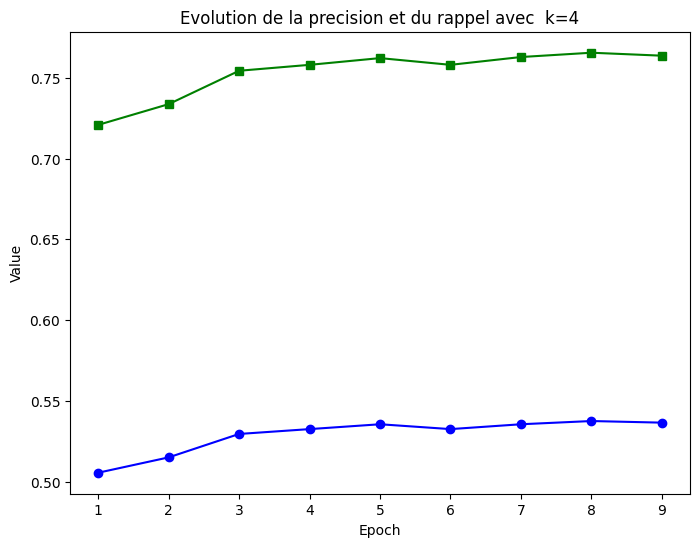

In [ ]:
plt.figure(figsize=(8, 6))


plt.plot(epochs, prec_at_4, marker='o', color='blue', label='Precision at k=4')
plt.plot(epochs, rec_at_4, marker='s', color='green', label='Recall at k=4')

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Evolution de la précision et du rappel avec k=4')
plt.show()
    
# END TODO

On remarque une augmentation pour la précision ainsi que le rappel. 
En effet, les performances à k=4 étaient les suivantes :  
-sans l'affiange : precision = 0.503 / recall = 0.71  
-avec l'affinage (après 8 epochs) : precision= 0.5375 / recall = 0.7655.   
Il y a donc une nette amélioration quant à la récupération de passages pertinents sur notre jeu de données. 
On travaillera donc par la suite sur cet encodeur finetuné sur 8 epochs (car notre modèle overfit ensuite)

In [61]:
emb_model.load_state_dict(torch.load("fine_tuned_model_weights_8.pth"))

<All keys matched successfully>

### Finetuning du Reranker

In [62]:
from sentence_transformers import CrossEncoder
reranker = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2', device=DEVICE)

#### Génération des tuples d'exemples positifs et négatifs

In [ ]:
import random

training_data = []

all_passage_ids = set(texts["id"].values)

for _, entry in questions_train.iterrows():
    question = entry["question"]
    passage_ids = entry["text_ids"].strip('[]').split()
    passage_ids = [int(id) for id in passage_ids]

    # Positifs
    positives_passages = [
        texts.loc[texts["id"] == passage_id, "text"].values[0]
        for passage_id in passage_ids
    ]

    for idx, passage in enumerate(positives_passages):
        training_data.append((question, passage, 1.0))

    # Négatifs
    negative_ids = list(all_passage_ids - set(passage_ids)) 
    negative_samples = random.sample(negative_ids, min(4*len(passage_ids), len(negative_ids)))
    negative_passages = [
        texts.loc[texts["id"] == passage_id, "text"].values[0]
        for passage_id in negative_samples
    ]

    for passage in negative_passages:
        training_data.append((question, passage, 0.0))


df_train = pd.DataFrame(training_data, columns=["question", "passage", "score"])

#### Conversion sous un format accepté par le modèle

In [ ]:
from sentence_transformers import InputExample

train_samples = []

for index, row in df_train.iterrows():
    question = row['question']
    passage = row['passage']
    score = row['score']
    input_example = InputExample(texts=[question, passage], label=score)
    train_samples.append(input_example)

#### Génération de positifs et de négatifs pour l'évaluateur

In [ ]:
import random

val_samples = []

all_passage_ids = set(texts["id"].values)

for _, entry in questions_val.iterrows():
    question = entry["question"]
    passage_ids = entry["text_ids"].strip('[]').split()
    passage_ids = [int(id) for id in passage_ids]

    # Positifs
    positives_passages = [
        texts.loc[texts["id"] == passage_id, "text"].values[0]
        for passage_id in passage_ids
    ]

    # Négatifs
    negative_ids = list(all_passage_ids - set(passage_ids))
    negative_samples = random.sample(negative_ids, min(4*len(passage_ids), len(negative_ids)))
    negative_passages = [
        texts.loc[texts["id"] == passage_id, "text"].values[0]
        for passage_id in negative_samples
    ]

    # Ajouter les données formatées dans val_samples
    val_samples.append({
        "query": question,
        "positive": positives_passages,
        "negative": negative_passages,
    })

#### Entrainement

In [ ]:
train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=8)

In [ ]:
from sentence_transformers.cross_encoder.evaluation import CERerankingEvaluator

# On utilise un évaluateur pour retourner le meilleur modèle (en fonction des exemples de validation val_samples)
evaluator = CERerankingEvaluator(val_samples, name="train-eval")

reranker.fit(
    train_dataloader=train_dataloader,
    evaluator=evaluator,
    evaluation_steps=1000,
    epochs=8,
    warmup_steps=5000,
    output_path='./fine_tuned_crossencoder'
)

#### Evaluation de l'approche

Cette approche par re-ranking a pu augmenter notre score BLEU-2.   
A titre d'information sur Kaggle :   
-score sans reranker : 0,38860  
-score avec reranker : 0,40787  
-score avec reranker finetuné : 0,42625  
Il faut aussi remarquer que l'augmentation du score est aussi étroitement lié au changement du prompt et sa structure, dans lequel on demandait désormais au modèle de prioriser les informations.

On travaillera donc par la suite avec ce reranker finetuné.  

In [63]:
fine_tuned_reranker = CrossEncoder('./fine_tuned_crossencoder')

### Génération finale

In [64]:
# On réencode les passages avec le nouvel encodeur
passage_embed = encode_sequences(passages, emb_tokenizer, emb_model)
passage_embeddings = passage_embed.cpu().numpy()

faiss.normalize_L2(passage_embeddings) 
d = passage_embeddings.shape[1]
index = faiss.IndexFlatIP(d)
index.add(passage_embeddings)

In [65]:
def rank_answers(question, top_passages_ids, reranker):
    
    passages_texts = texts[texts['id'].isin(top_passages_ids)]['text'].tolist()
    question_answer_pairs = [(question, passage) for passage in passages_texts]
    scores = reranker.predict(question_answer_pairs)
    ranked_answers = [passage for _, passage in sorted(zip(scores, passages_texts), reverse=True)]

    ranked_passages_ids = []

    for passage in ranked_answers:
        passage_id = texts.loc[texts['text'] == passage, 'id'].values
        if len(passage_id) > 0:
            ranked_passages_ids.append(passage_id[0])
    
    return ranked_passages_ids

In [66]:
def generate_prompts_rerank(questions, index, emb_tokenizer, emb_model, k) : 
    prompts = []
    faiss_passages = retrieve_passages_faiss(questions, index, k, emb_tokenizer, emb_model)  
    help_instruction = "Give a concise answer to the question prioritizing information based on the order of the following documents:"

    top_passages_ranked = []

    # Reranking des passages
    for i, passages_id in enumerate(faiss_passages):
        ranked_passages = rank_answers(questions[i], passages_id, fine_tuned_reranker)[:k]
        top_passages_ranked.append(ranked_passages)

    # Boucle sur chaque question et ses passages associés
    for i, passages_id in enumerate(top_passages_ranked):
        passages = []

        # Récupérer les textes des passages associés à la question actuelle
        for passage_id in passages_id:
            passage_text = texts[texts['id'] == passage_id]['text'].iloc[0]
            passages.append(passage_text)

        # Construire le contexte complet et l'ajouter à la liste des prompts pour k
        context_string = (
            f"{help_instruction}\n" +
            "\n".join([f"Document {j+1}:{passage}" for j, passage in enumerate(passages)]) +
            "\n" +
            f"{questions[i]}\n"
        )
        prompts.append(context_string)
    return prompts

In [67]:
prompts_new = generate_prompts_rerank(questions_v, index, emb_tokenizer, emb_model, 4)

In [68]:
print(prompts_new[0])

Give a concise answer to the question prioritizing information based on the order of the following documents:
Document 1: Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect.
Document 2: There are no selective inhibitors of CYSLTR2 in clinical use. However, Gemilukast has been reported to inhibit both CysLTR1 and CysLTR2. The role of CYSLTR2 in allergic and hypersensitivity diseases of humans must await the development of selective CysLTR2 inhibitors. Chronic treatment with Montelukast, Zafirlukast, and Pranlukast, drugs that are selective receptor antagonists of CysLTR1, reduces allergic and hypersensitivity responses in humans and animal models.
Document 3: CYSLTR2 is co-expressed with CysLTR1 in human blood eosinophils and platelets, and tissue mast cells, macropha

In [69]:
generated_responses_new = generate_responses(gen_model, gen_tokenizer, prompts_new)

[k=4 | Batch 0] Started generation...
[k=4 | Batch 0] Time for generation = 2.01 seconds
[k=4 | Batch 1] Started generation...
[k=4 | Batch 1] Time for generation = 1.79 seconds
[k=4 | Batch 2] Started generation...
[k=4 | Batch 2] Time for generation = 1.80 seconds
[k=4 | Batch 3] Started generation...
[k=4 | Batch 3] Time for generation = 1.86 seconds
[k=4 | Batch 4] Started generation...
[k=4 | Batch 4] Time for generation = 1.90 seconds
[k=4 | Batch 5] Started generation...
[k=4 | Batch 5] Time for generation = 1.71 seconds
[k=4 | Batch 6] Started generation...
[k=4 | Batch 6] Time for generation = 1.70 seconds
[k=4 | Batch 7] Started generation...
[k=4 | Batch 7] Time for generation = 1.71 seconds
[k=4 | Batch 8] Started generation...
[k=4 | Batch 8] Time for generation = 1.78 seconds
[k=4 | Batch 9] Started generation...
[k=4 | Batch 9] Time for generation = 1.90 seconds
[k=4 | Batch 10] Started generation...
[k=4 | Batch 10] Time for generation = 1.51 seconds
[k=4 | Batch 11] St

### 4.4. Évaluation (2 points)

#### 4.4.1. Évaluez votre modèle sur le jeu de validation en utilisant la métrique BLEU-2 (1 point)

In [70]:
df_true_new = questions_val[['id', 'answer']].copy()
df_pred_new = questions_val[['id']].copy()
df_pred_new['answer'] = generated_responses_new

print(f"Le score BLEU-2 est {evaluate_bleu(df_true_new, df_pred_new, 2):.3f}.")

Le score BLEU-2 est 0.456.


#### 4.4.2 Comparez les résultats obtenus avec les modèles précédents sur l'ensemble de validation. Quelles sont vos conclusions? (1 point)

### 4.5. Analyse (8 points)
#### 4.5.1. Avantages/limites/Erreurs types (5 points)
En quelques phrases précises, discutez des avantages et limites de votre meilleure architecture. Analysez les cas d’erreur.

L'architecture propose plusieurs avantages notables :  
Le fine-tuning de l'encodeur BGE avec l'approche DPR permet de produire des représentations denses alignant efficacement les requêtes avec les documents pertinents, grâce à l'apprentissage contrastif utilisant des exemples positifs et négatifs. Cela assure une récupération initiale robuste.  
Ensuite, le reranker, également finetuné, affine l'ordre des documents en capturant des relations contextuelles complexes grâce à des modèles cross-encodeurs. Cette étape améliore significativement la précision des résultats, notamment pour des requêtes ambiguës ou complexes. 

Cependant, l'architecture présente certaines limites.   
Le fine-tuning avec DPR nécessite un certain temps d'entrainement (de l'ordre de 4h sur 10 epochs). De plus, le reranking, bien qu'efficace, est computationnellement intensif, limitant la scalabilité pour de grands corpus ou des systèmes en temps réel.  
Par ailleurs, le reranker peut parfois surpondérer les documents initiaux classés haut par l'encodeur, au détriment de la diversité des résultats.  
Enfin, le modèle phi-3 peut introduire des erreurs génératives, comme des hallucinations ou des informations non factuelles, surtout si les documents rerankés contiennent des données ambiguës. Ces erreurs sont amplifiées lorsque la récupération initiale manque de diversité ou de pertinence.


#### 4.5.2. Améliorations potentielles (3 points)

Indiquez deux pistes d’amélioration futures potentielles et pourquoi vous pensez qu'elles permettraient d'obtenir de meilleurs résultats en vous basant sur un raisonnement logique ou sur des références à l'état de l'art

Nous pensons que finetuné notre modèle génératif en utilisant notre jeu de donnée d'entrainement pourrait être une option à considérer. 
En effet, on pourrait par exemple finetuné notre modèle 
